In [2]:
import pandas as pd
pumpkins = pd.read_csv('../data/US-pumpkins.csv')


pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]


print(pumpkins.shape)

(415, 26)


In [3]:
pumpkins.isnull().sum()
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:,columns_to_select]


In [4]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

month

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)

In [5]:
new_pumpkins=pd.DataFrame({'Month': month, 'Package': pumpkins['Package'],
                           'Low Price': pumpkins['Low Price'],
                           'High Price': pumpkins['High Price'],
                           'Price': price})
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


In [6]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins = new_pumpkins.drop(columns=['Package'])
print(new_pumpkins)

      Month  Low Price  High Price  Price
70        9      15.00        15.0  13.50
71        9      18.00        18.0  16.20
72       10      18.00        18.0  16.20
73       10      17.00        17.0  15.30
74       10      15.00        15.0  13.50
...     ...        ...         ...    ...
1738      9      15.00        15.0  30.00
1739      9      13.75        15.0  28.75
1740      9      10.75        15.0  25.75
1741      9      12.00        12.0  24.00
1742      9      12.00        12.0  24.00

[415 rows x 4 columns]


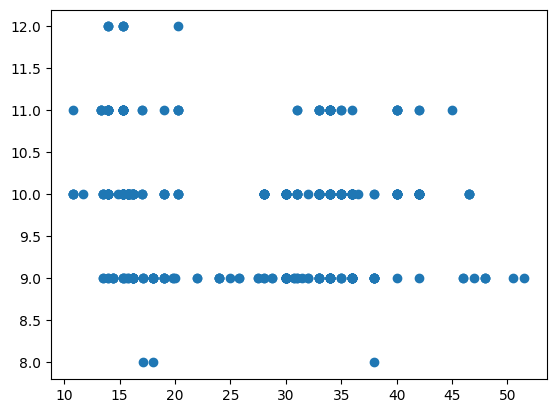

In [7]:
import matplotlib.pyplot as plt

price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

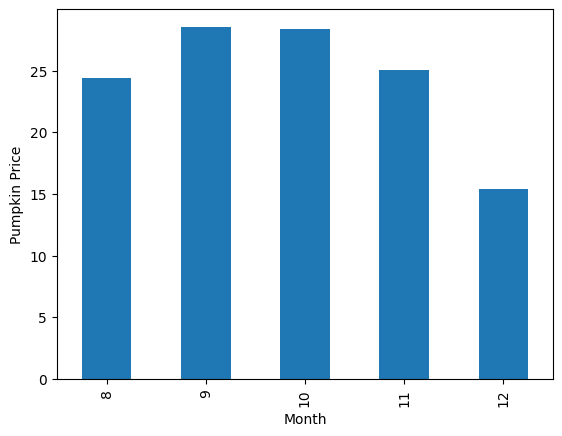

In [8]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')

Text(0, 0.5, 'entry b')

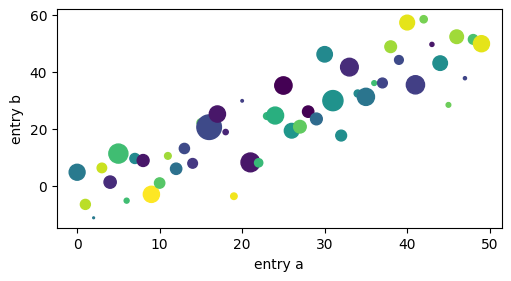

In [ ]:
import numpy as np



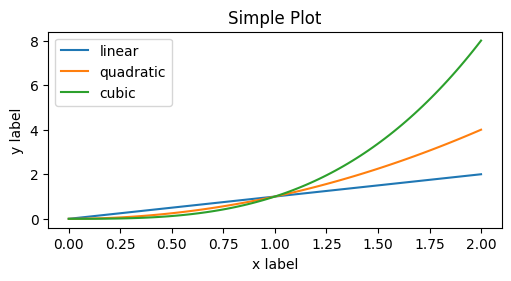